<a href="https://colab.research.google.com/github/toyeshg/Image-Classifier-MNIST-using-Tensorflow/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting up Keras and Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


defining catergories as classes

In [5]:
class_names=['Tshirt/Top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']


###Describing the training dataset we have

In [6]:
train_images.shape

(60000, 28, 28)

We got 60,000 images on us, each with 28X28 pixels

In [7]:
len(train_labels)

60000

We have 60,000 labels

###Describing the test dataset

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

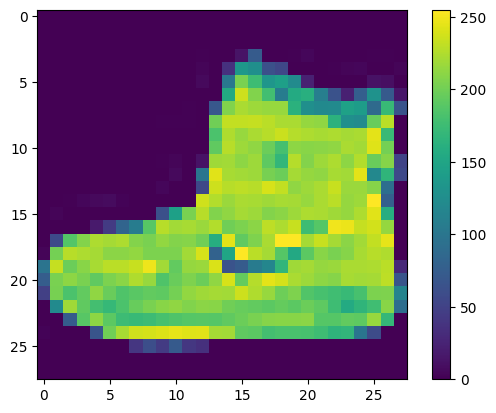

In [10]:
plt.imshow(train_images[0])
plt.colorbar()

**It's much more efficient when we pass values of range 0-1.**

so we scale them to 0-1 before feeding them to the neural network model

In [11]:
train_images=train_images/255.0


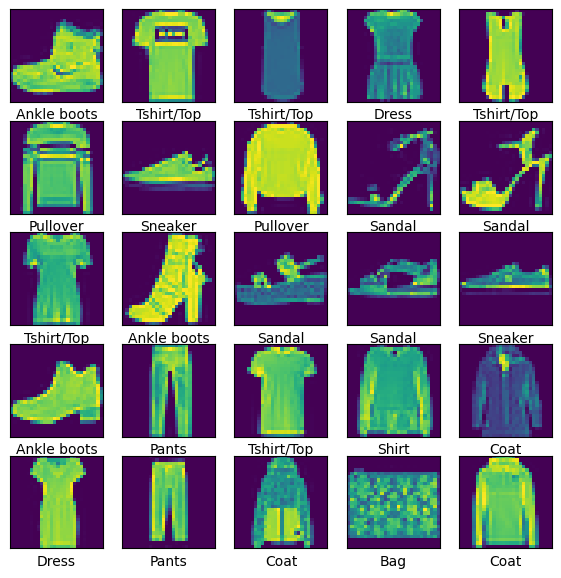

In [12]:
plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1) #We make it i+1 because the range must lie b/w 1-25 not 0-24
  plt.xticks([]) #to remove the labels on x axis from 0 to 28
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#Building the Neural Network

###Building the layers

The first **Flatten** layer transforms the format of the image from a 2D array of 28X28 to a 1D array of 28 x 28 = 784 pixels

(Just to reformat the data)

**2 Dense layers** fully or densenely connected layers to each other

Has 128 nodes and 10 nodes respectively accompanied by softmax layer and returns an array of probability scores that sum to 1.

Each node contains a probabilty that the current image belongs to one of those 10 classes

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam', #how the model is updated based on the data it sees and it's loss function
              loss='sparse_categorical_crossentropy', #measures how accurate the model is during training
              metrics=['accuracy'])#(fraction of the images correctly classified)monitors the training and testing steps

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4920 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3684 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3331 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3108 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2920 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2770 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2558 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2449 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

##Evaluating the accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 59.3224 - accuracy: 0.8751
Test accuracy:  0.8751000165939331


Shows Overfitting

In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step
